<a href="https://colab.research.google.com/github/Lorraine254/Prep/blob/main/Analysis%20NFL%20Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Case Study: Analysis of Scoring in the NFL.**
---

The file ScoringNFL contains the points scored by each National Football League team for 10 seasons.


* NFL leadership is interested in seeing how the distribution of scoring across the league has changed over these 10 seasons.

  - Construct a single chart that allows the audience to make these comparisons.

  - Provide a thorough discussion of the distribution of scoring in the league over this decade.

* NFL leadership is also interested in the temporal patterns in scoring for individual teams.

   - Unstack the data and use sparklines to show how scoring for each team has
   changed over these 10 seasons.

   - List a team with a strong upward trend over these 10 seasons.

   - List a team with a strong downward trend over these 10 seasons.




**CRISP-DM METHODOLOGY**


> **Business Understanding:**
 (*What Does the business need?*)

> **Data Understanding:**
(*What data do we have/ need? Is it clean?*)

> **Data Preparation:**
(*How do we organize the data for modeling*)

> **Modeling:**(*What modeling
techniques should we apply*)
> **Model Evaluation:**(*Which Model best meets the business objectives*)

> **Deployment:**(*Making it accessible to stakeholder*)



## Loading the required libraries

In [187]:
# For data manipulation
import pandas as pd
import matplotlib.pyplot as plt


## Fetching the data

In [188]:
data = pd.read_csv('https://raw.githubusercontent.com/Lorraine254/Prep/main/ScoringNFL.csv')

#Viewing the first few rows
data.head()

Team  Season  Points Scored
0      Baltimore Ravens    2010            357
1   San Francisco 49ers    2010            305
2  Tampa Bay Buccaneers    2010            341
3    New Orleans Saints    2010            384
4    Kansas City Chiefs    2010            366

## Data Understanding

* Shape of the dataset
* Data types
* Descriptive statistics
* Presence of missing values
* Outliers
* Data Exploration(Univariate analysis and bivariate analysis)

In [189]:
# shape of the data(rows,colums)
data.shape

(320, 3)

**Insight:**

The data contains 320 rows and 3 columns.Refering to the concept of sample sizes in Statistics, the threshold of 30 is used to determine if a sample size is small or large. Since the data is greater than 30 hence it can be considered to be a large sample size.

In [190]:
# Data types
data.dtypes

Team             object
Season            int64
Points Scored     int64
dtype: object

**Insight:**

The team variable is given the data type object.

In statistics there are two data types i.e numerical and categorical. Hence we have to convert the object datatype to category.

We also change the season data type to datatime.

In [191]:
# Converting the team data type to 'category'
data['Team']=data['Team'].astype('category')

# Assuming 'years' is a column in your DataFrame
data['Season'] =pd.to_datetime(data['Season'], format='%Y')
data['Season']=data['Season'].dt.year


# Checking the data type again
data.dtypes

Team             category
Season              int64
Points Scored       int64
dtype: object

In [192]:
# Descriptive Statistics - Numerical
data.describe()

Season  Points Scored
count   320.00000     320.000000
mean   2014.50000     362.290625
std       2.87678      70.133012
min    2010.00000     193.000000
25%    2012.00000     311.500000
50%    2014.50000     361.000000
75%    2017.00000     406.000000
max    2019.00000     606.000000

**Insight**:

 - The table above gives the descriptive statistics of the numerical columns in the dataset

 Points  Column
 - The maximum points scored is 606.
 - The minimum points scored is 193.
 - Has a high standard, thus implying that the data might have outliers.


In [193]:
# Descriptive Statistics for categorical
data.describe(include='category')

Team
count                 320
unique                 32
top     Arizona Cardinals
freq                   10

In [194]:
# Value count of each team
data['Team'].value_counts()

Arizona Cardinals       10
Atlanta Falcons         10
Tennessee Titans        10
Tampa Bay Buccaneers    10
Seattle Seahawks        10
San Francisco 49ers     10
Pittsburgh Steelers     10
Philadelphia Eagles     10
Oakland Raiders         10
New York Jets           10
New York Giants         10
New Orleans Saints      10
New England Patriots    10
Minnesota Vikings       10
Miami Dolphins          10
Los Angeles Rams        10
Los Angeles Chargers    10
Kansas City Chiefs      10
Jacksonville Jaguars    10
Indianapolis Colts      10
Houston Texans          10
Green Bay Packers       10
Detroit Lions           10
Denver Broncos          10
Dallas Cowboys          10
Cleveland Browns        10
Cincinnati Bengals      10
Chicago Bears           10
Carolina Panthers       10
Buffalo Bills           10
Baltimore Ravens        10
Washington Redskins     10
Name: Team, dtype: int64

**Inference:**

- There are 32 unique teams
- Each team has played 10 games


In [195]:
# Checking for missing values
print('Null values present in the data set')
print(data.isnull().sum())

Null values present in the data set
Team             0
Season           0
Points Scored    0
dtype: int64


- The dataset does not contain any missing values

<Axes: >

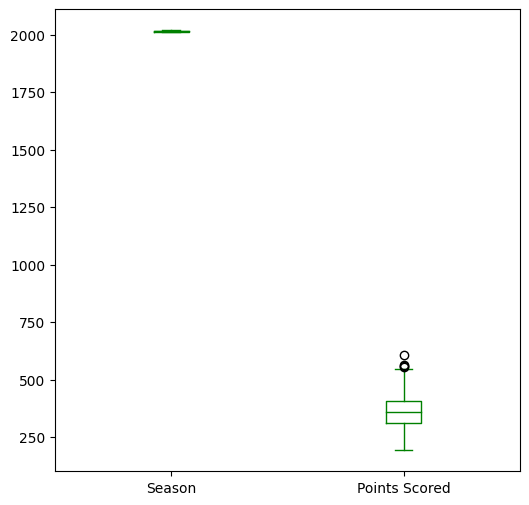

In [196]:
# Checking for outliers - we use a boxplot in this case
# Box and whisker plots
data.plot(kind='box',color='green',figsize = (6,6))

**Insight:**
- From the boxplot, it can clearly be seen that the points scored column contains outliers.

- Possible Causes of outlier Occurence:

  * Data entry and measurement errors
  * Sampling problems : your study might accidentally obtain an item or person that is not from the target population.
  * Natural Variation



### Data Exploration

**Univariate Analysis: Numerical Variables**

<Axes: title={'center': 'Histogram Plot of Points Scored'}, ylabel='Frequency'>

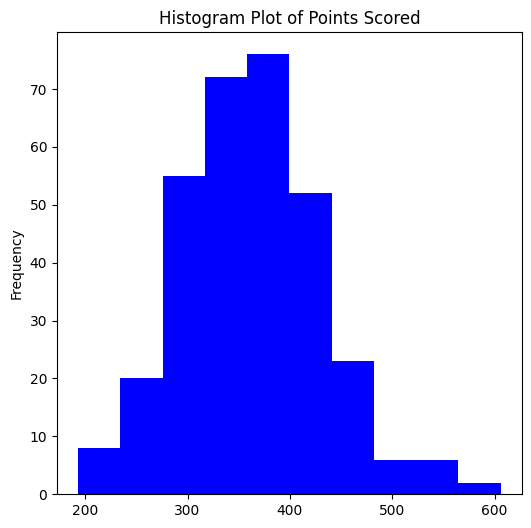

In [197]:
data['Points Scored'].plot(kind='hist',figsize=(6,6),color='blue',title='Histogram Plot of Points Scored')

<Axes: title={'center': 'Density Plot of Points Scored'}, ylabel='Density'>

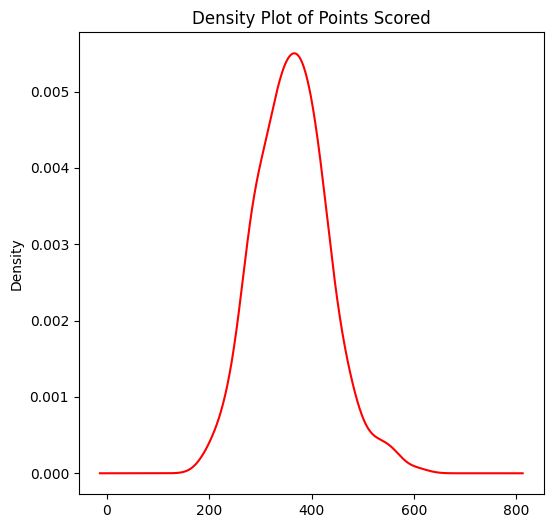

In [198]:
# Density Plots
data['Points Scored'].plot(kind='density',figsize = (6,6),color= 'red',title='Density Plot of Points Scored')

## Bivariate Analysis:

- Entails analysing two variables simultaneously
- Possible graphs:
 * Scatter plot
 * Correlation matrix
 * Line Plot

In [199]:
# Getting  the average of the scores based on the year
average_points_per_year = data.groupby('Season')['Points Scored'].mean()

# Create a new DataFrame for average points
average_points_df = pd.DataFrame({'Average Points': average_points_per_year})
average_points_df


Average Points
Season                
2010         352.59375
2011         354.87500
2012         364.09375
2013         374.53125
2014         361.40625
2015         365.00000
2016         364.40625
2017         347.50000
2018         373.50000
2019         365.00000

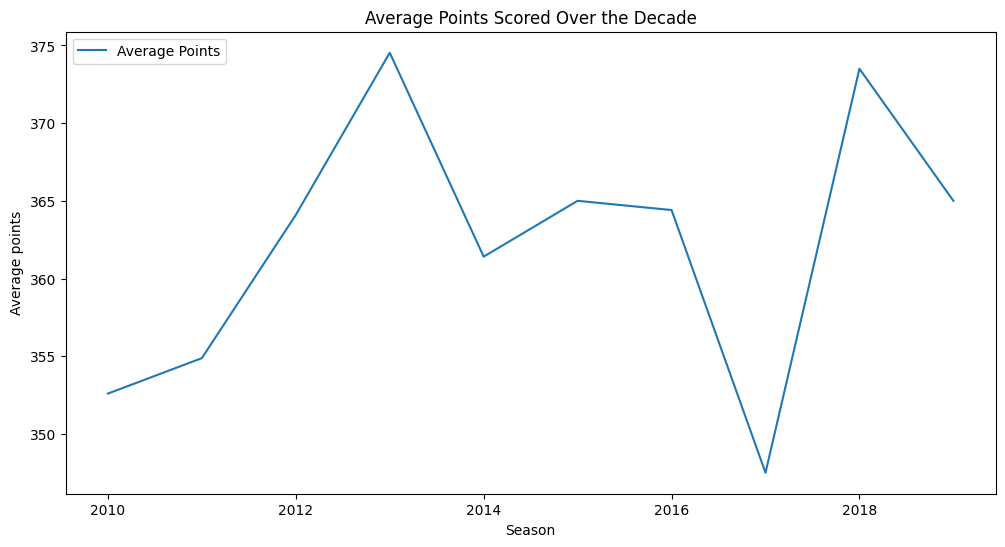

In [200]:
# Creating a line plot of the scores
average_points_df.plot(title='Average Points Scored Over the Decade',ylabel='Average points',figsize=(12,6))
plt.legend(loc='upper left')

**Insights:**
- Year 2013 had the highest average points scored.
- Year 2017 had the lowest average  points scored.

* NFL leadership is also interested in the temporal patterns in scoring for individual teams.

   - Unstack the data and use sparklines to show how scoring for each team has
   changed over these 10 seasons.

   - List a team with a strong upward trend over these 10 seasons.

   - List a team with a strong downward trend over these 10 seasons.

In [202]:
data.columns

Index(['Team', 'Season', 'Points Scored'], dtype='object')

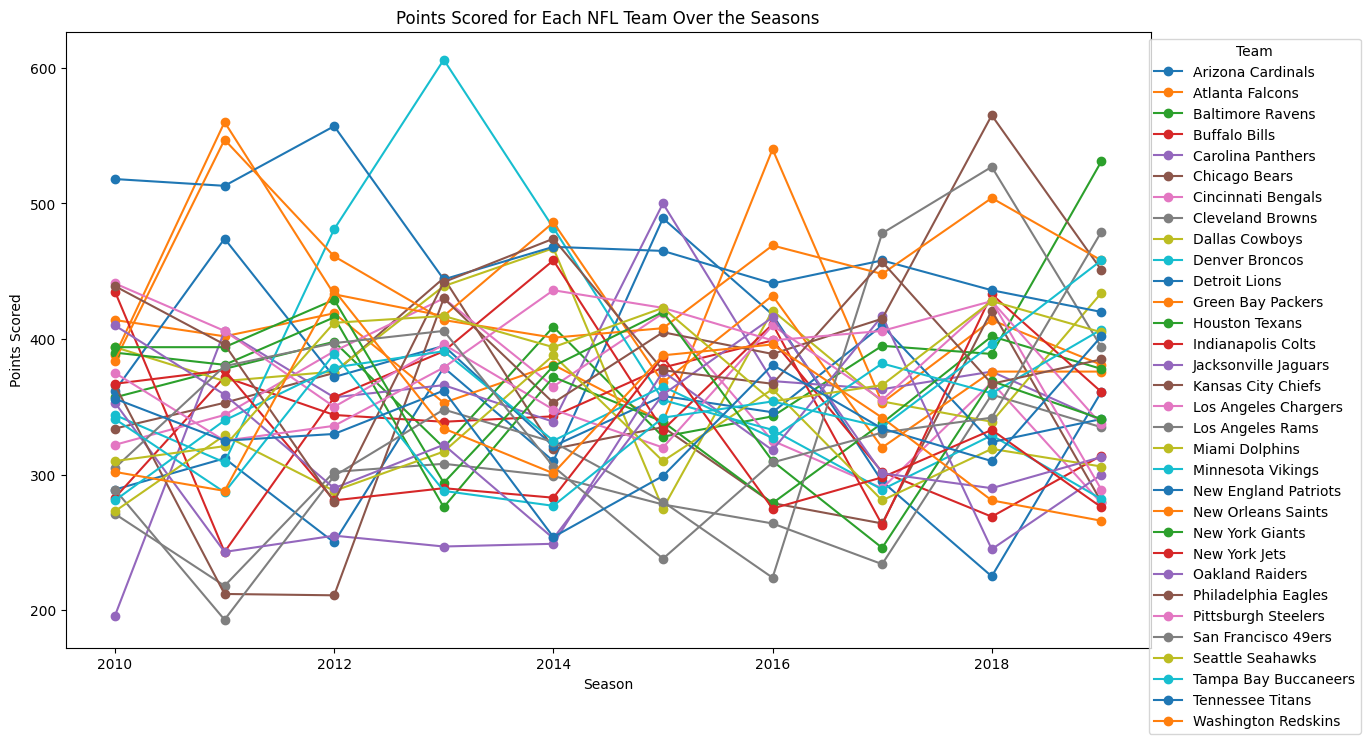

In [210]:
# Plotting data for each team
plt.figure(figsize=(14, 8))

for team, group in data.groupby('Team'):
    plt.plot(group['Season'], group['Points Scored'], label=team, marker='o', linestyle='-')

# Set plot labels and title
plt.title('Points Scored for Each NFL Team Over the Seasons')
plt.xlabel('Season')
plt.ylabel('Points Scored')

# Add legend
plt.legend(title='Team', loc='upper right', bbox_to_anchor=(1.2, 1))

# Show the plot
plt.show()

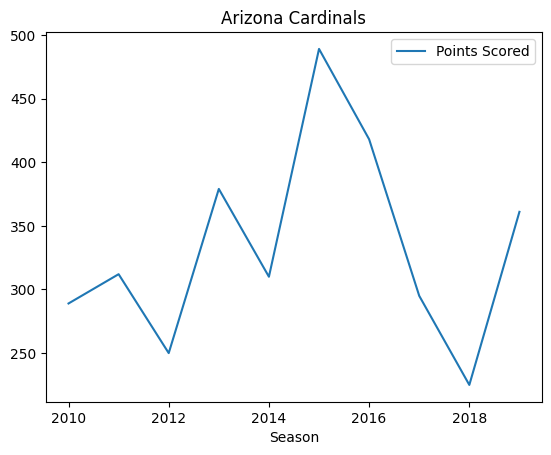

In [213]:
# Filtering the data based on a particular team
arizona=data[data['Team']=='Arizona Cardinals']


# Creating a line plot of the arizona data
arizona.plot(x='Season',y='Points Scored',title = 'Arizona Cardinals')
plt.legend(loc='upper right')

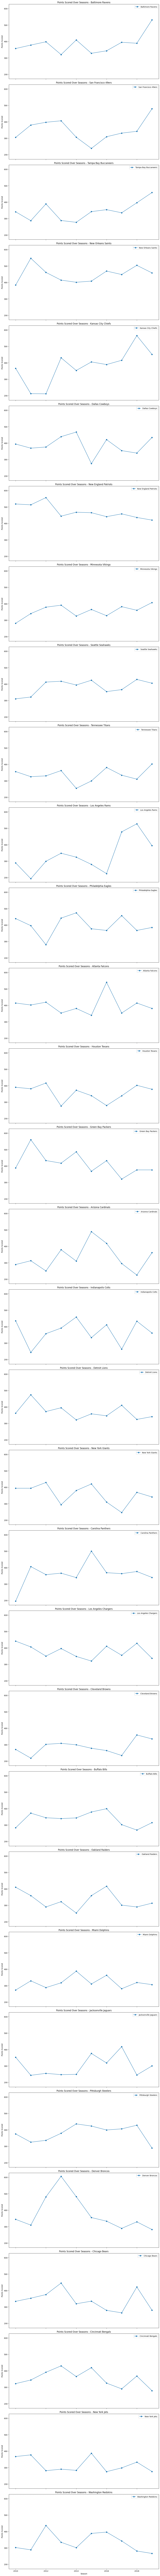

In [225]:
# Get unique team names
unique_teams = data['Team'].unique()

# Set layout parameters outside the loop
fig, axes = plt.subplots(nrows=len(unique_teams), figsize=(12, 6 * len(unique_teams)), sharex=True, sharey=True)

# Iterate through each team and create a line plot
for i, team in enumerate(unique_teams):
    team_data = data[data['Team'] == team]
    team_data.plot(x='Season', y='Points Scored', marker='o', linestyle='-', label=team, ax=axes[i])

    # Set subplot labels and title
    axes[i].set_title(f'Points Scored Over Seasons - {team}')
    axes[i].set_xlabel('Season')
    axes[i].set_ylabel('Points Scored')
    axes[i].legend()

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/tools.py:227: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(**fig_kw)


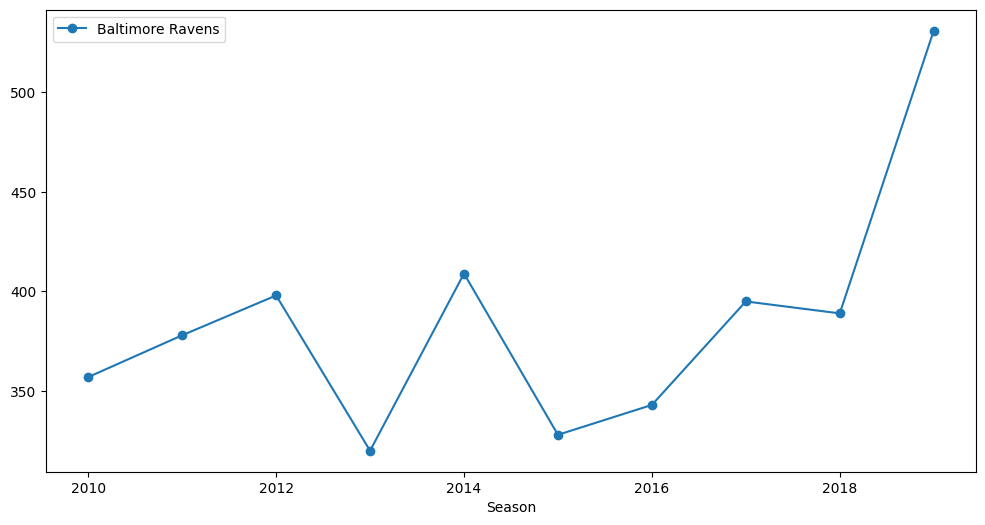

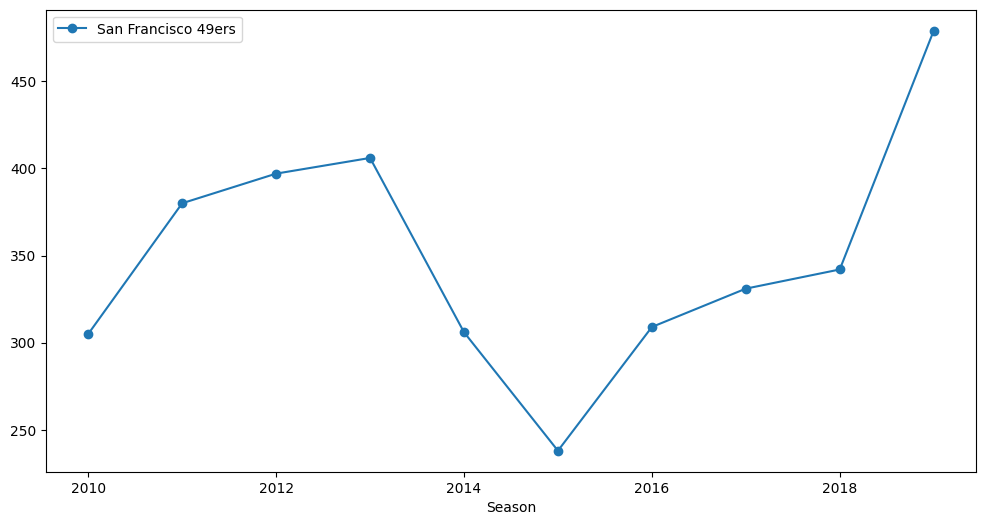

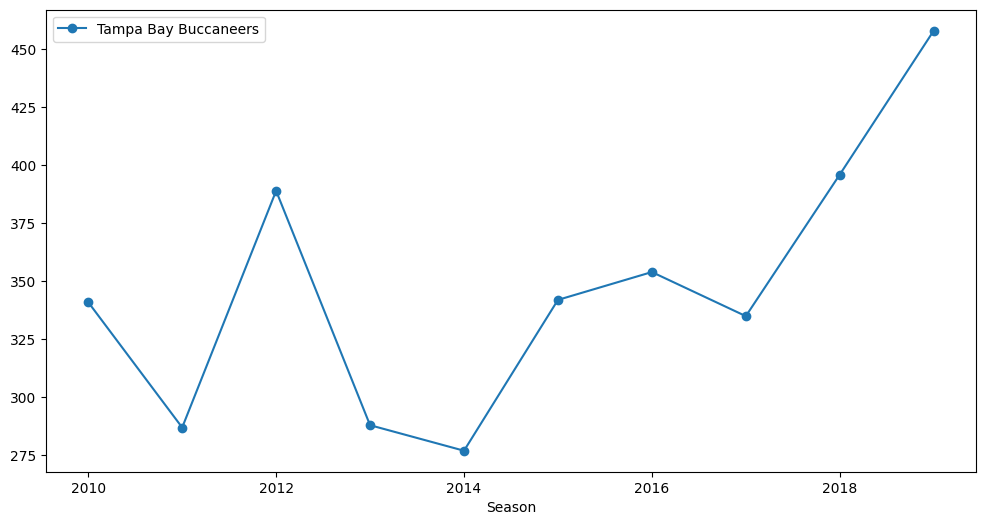

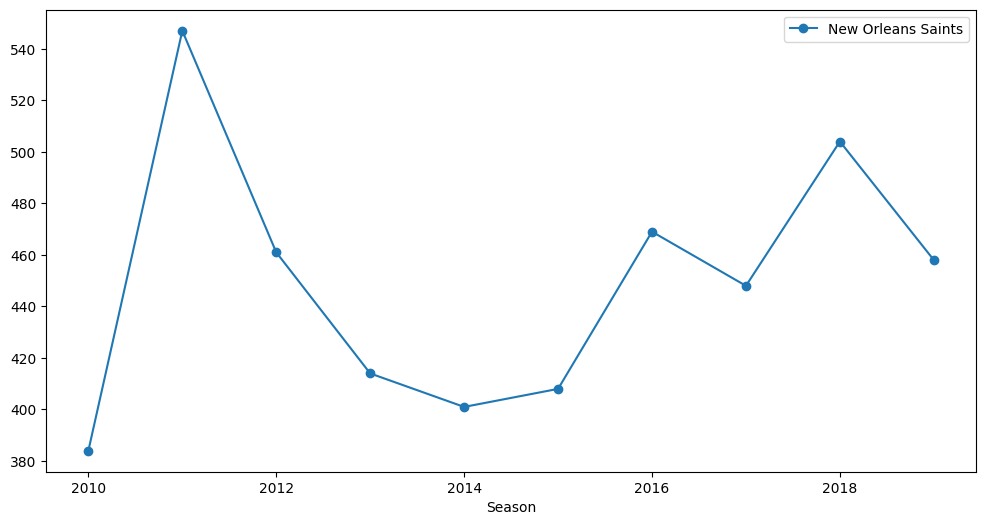

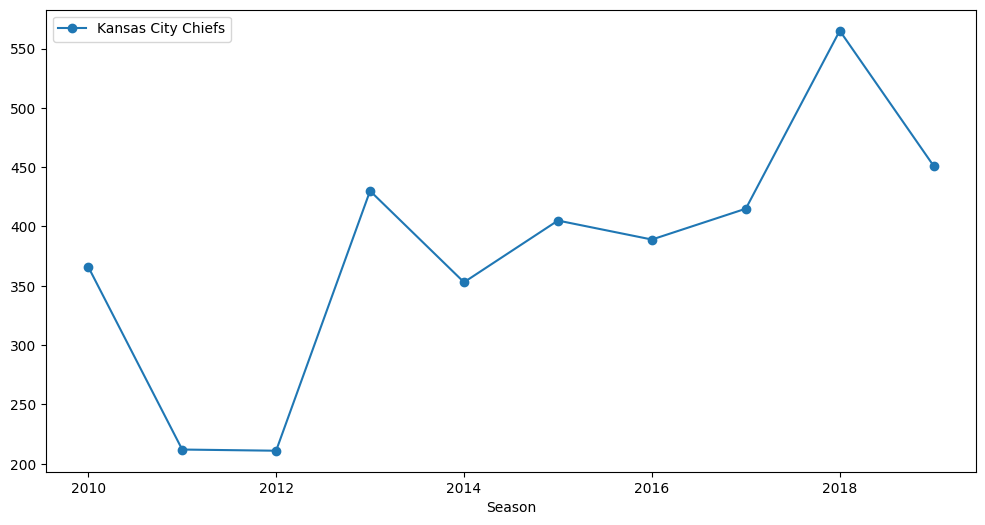

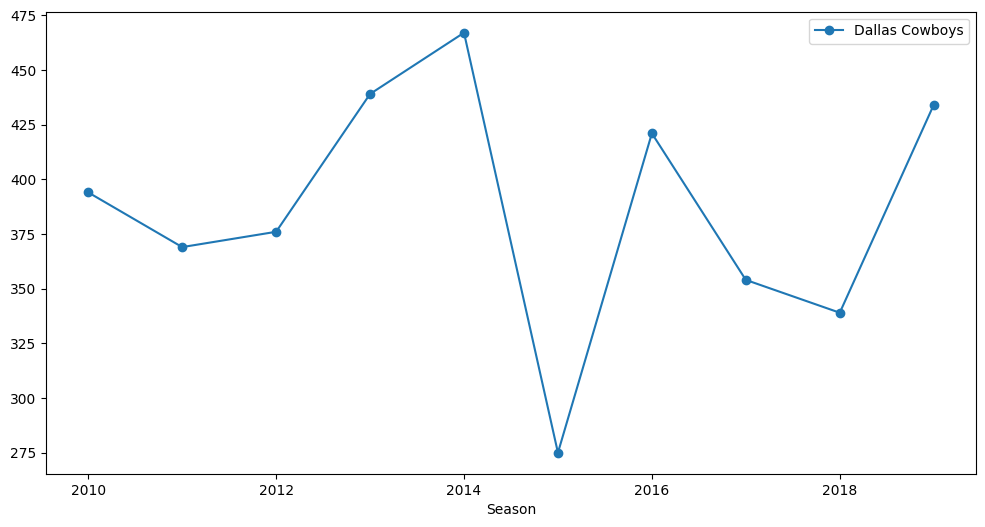

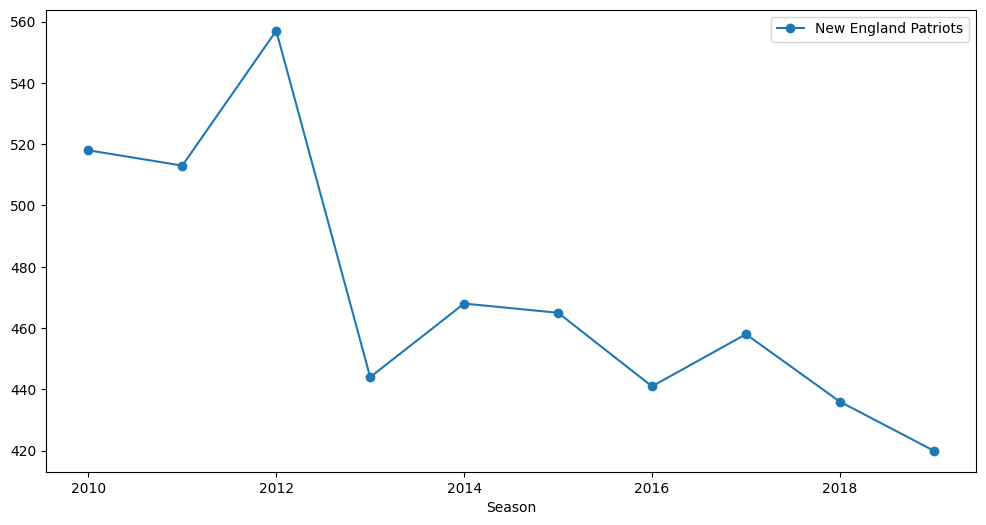

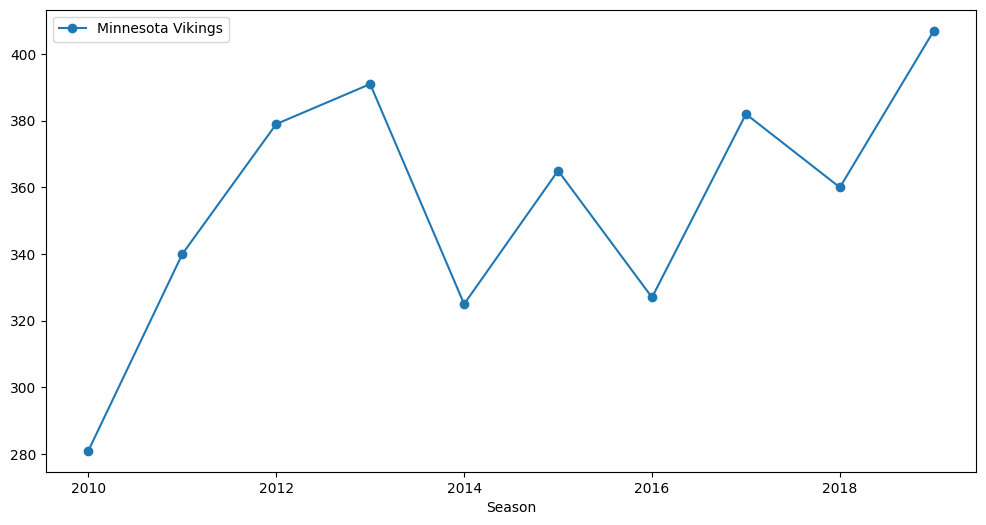

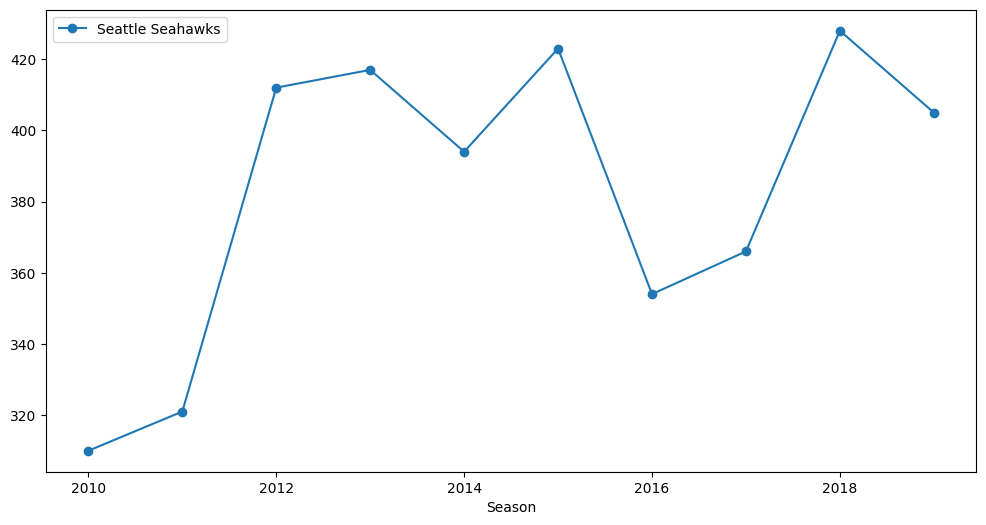

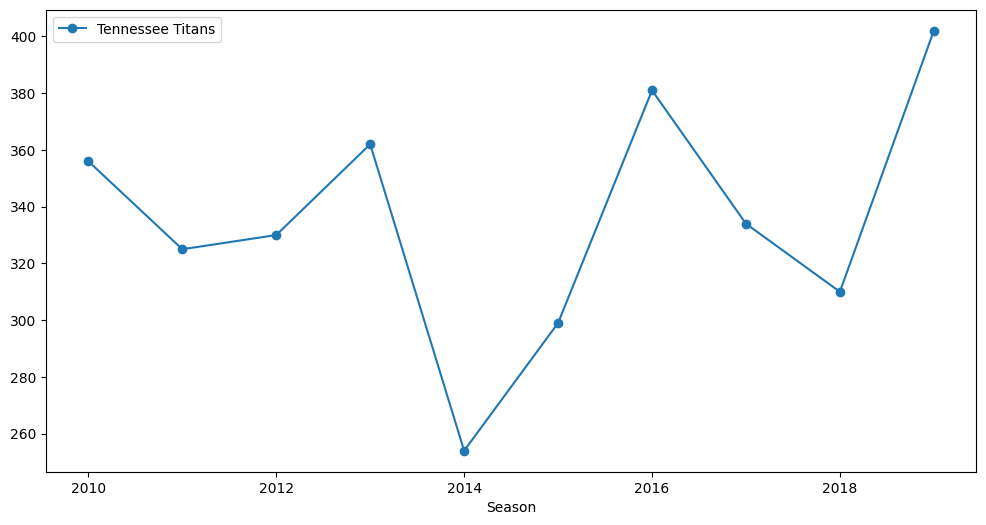

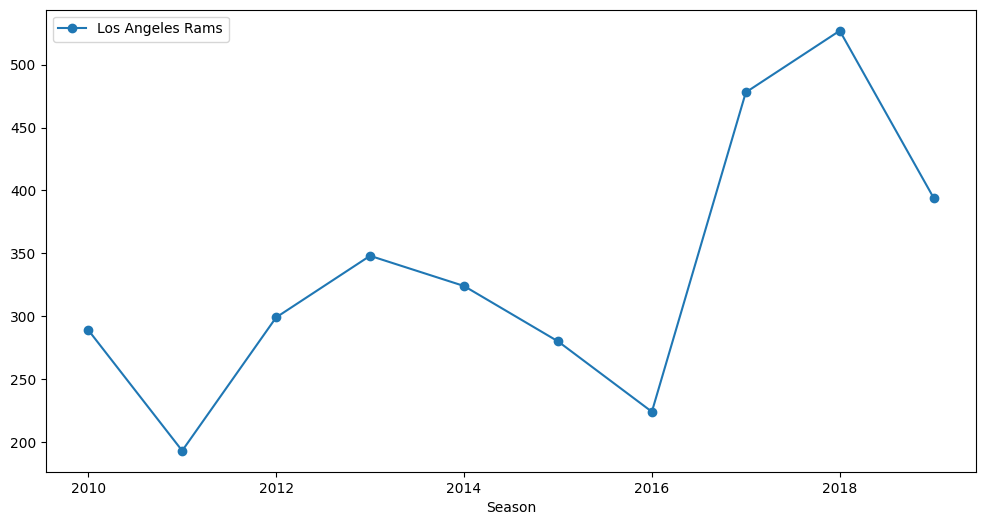

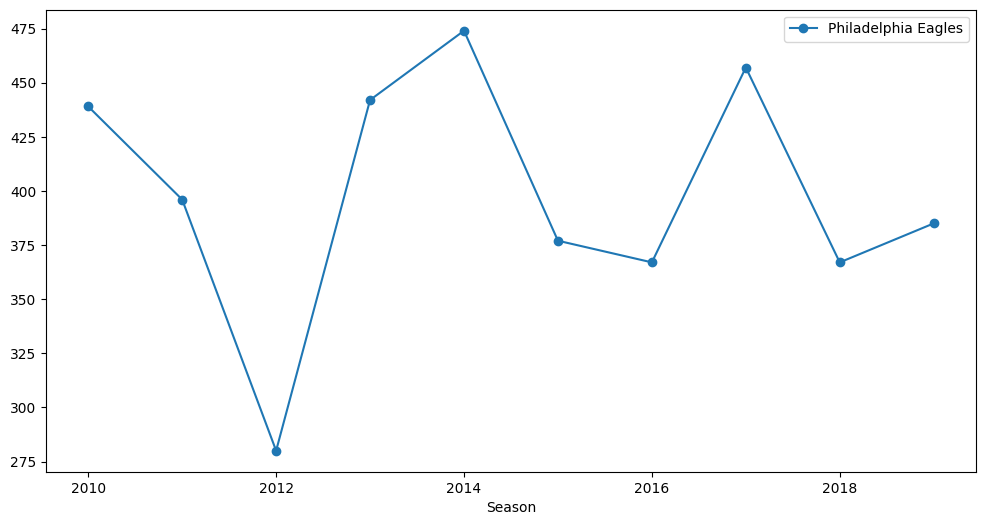

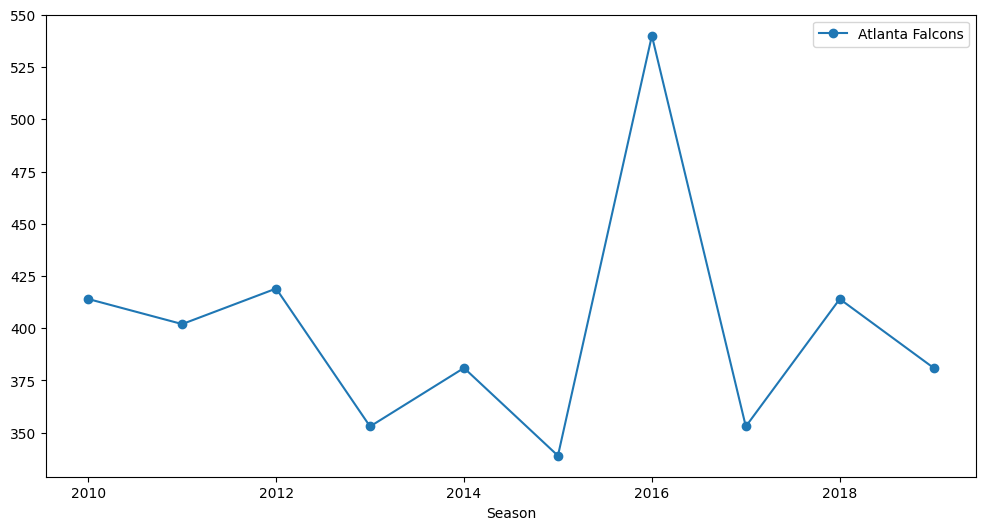

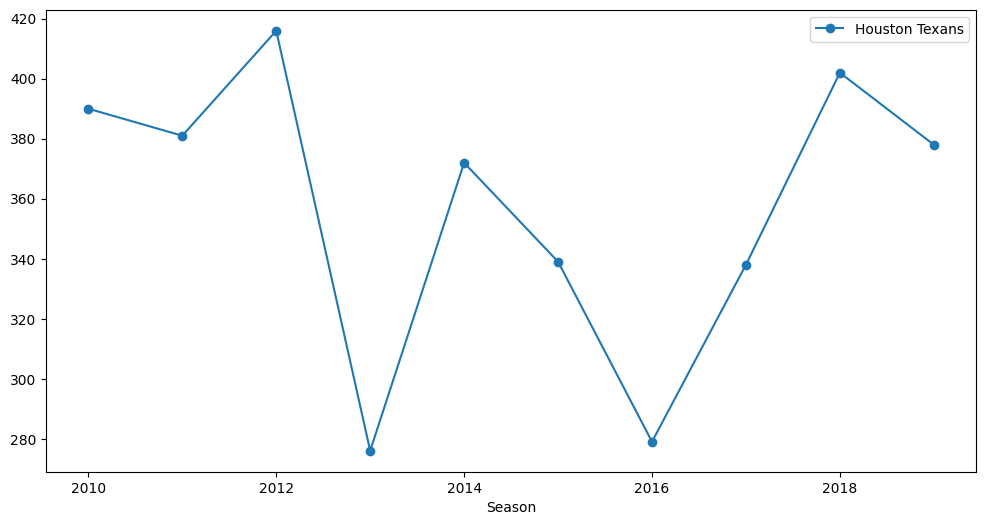

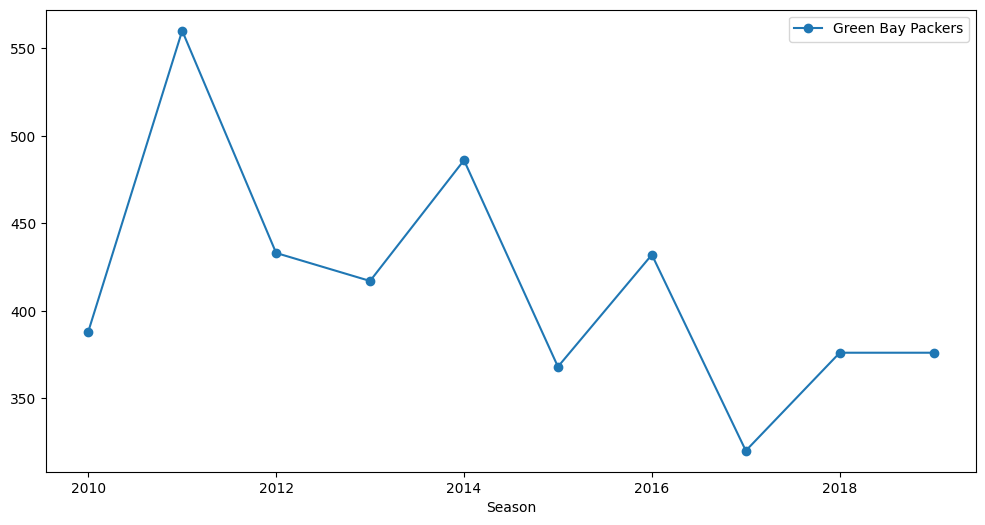

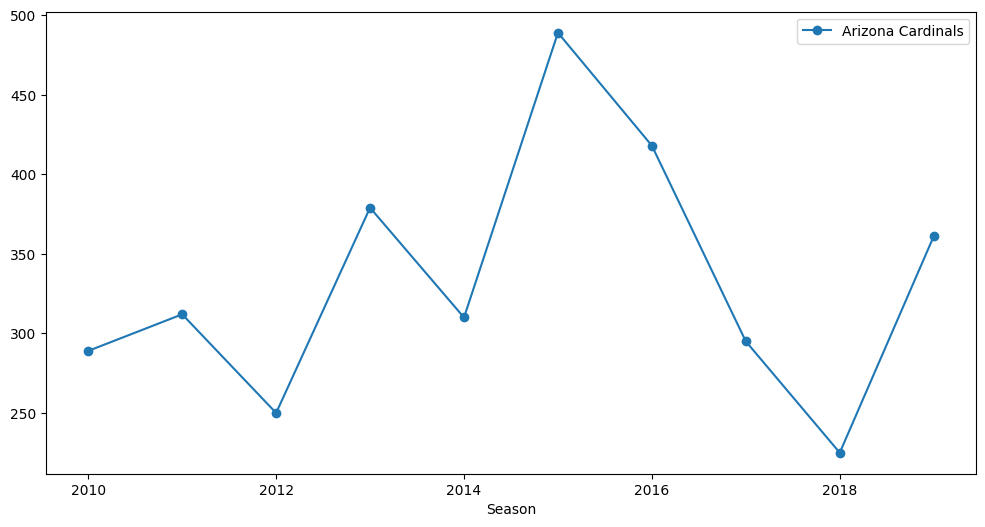

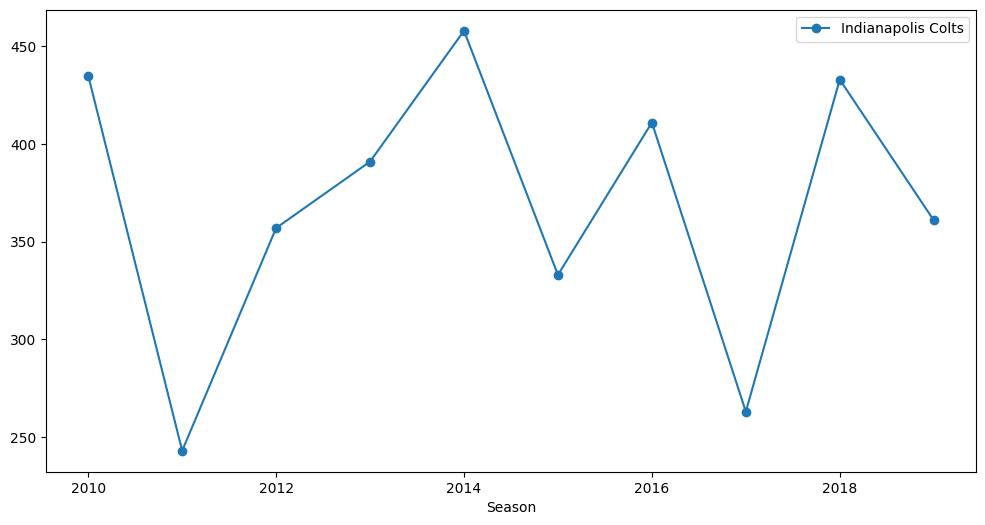

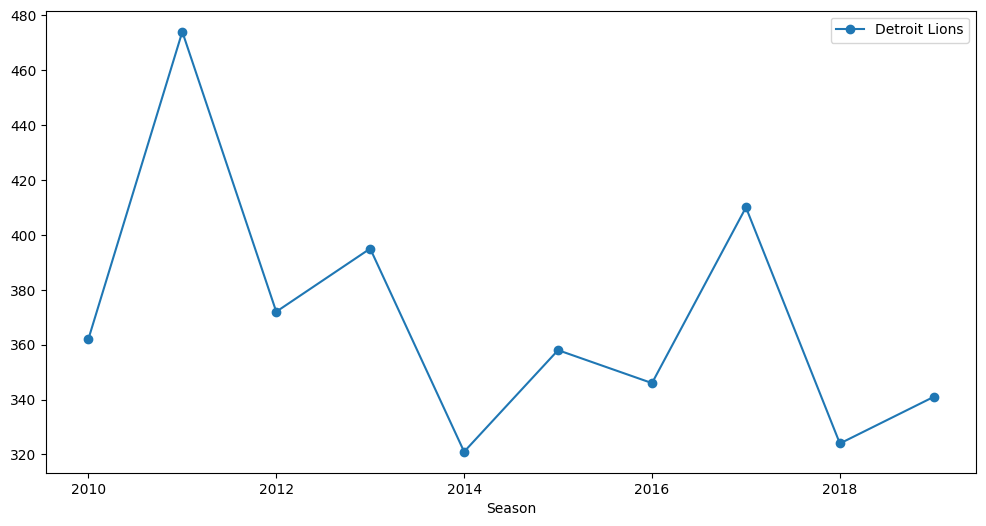

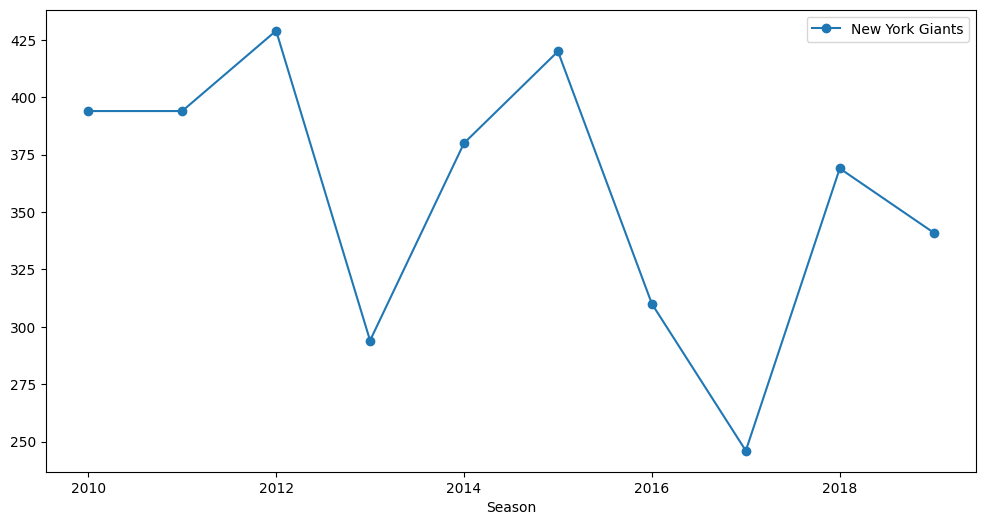

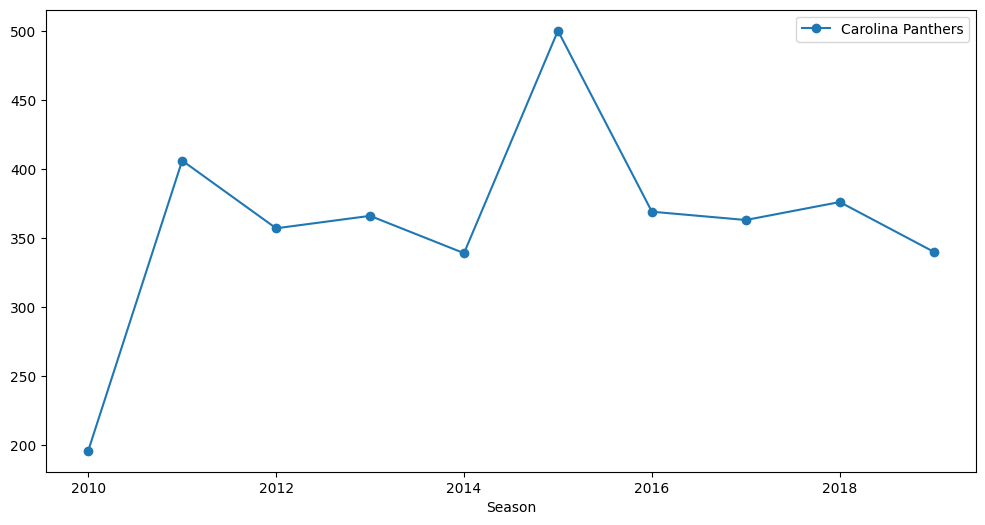

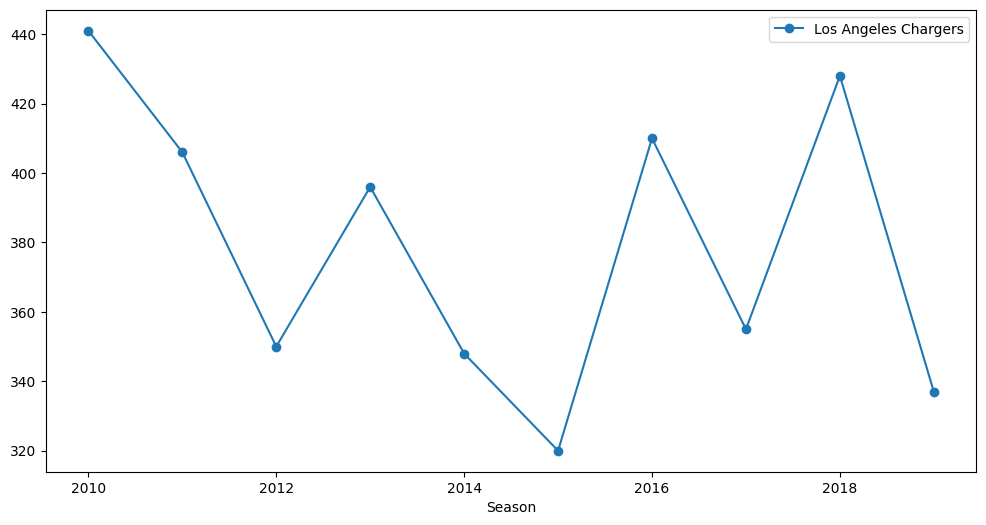

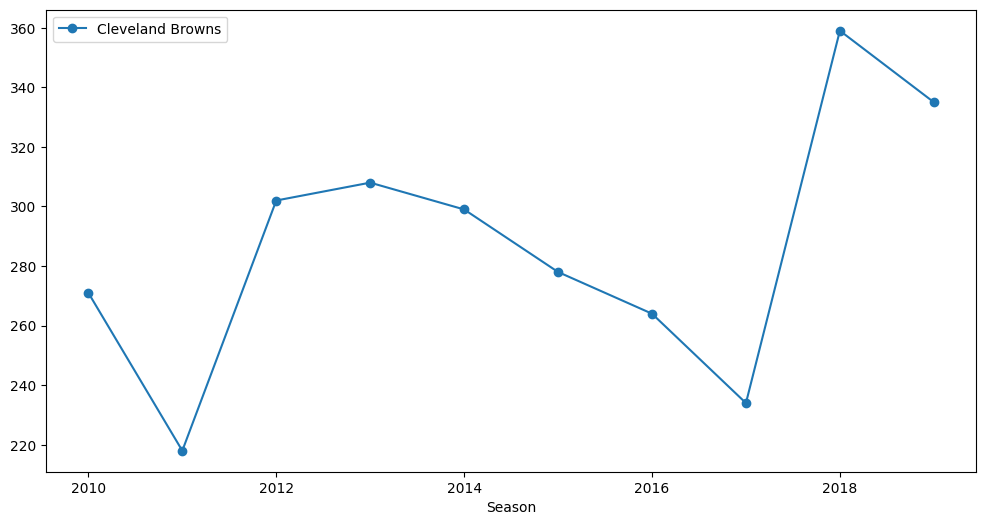

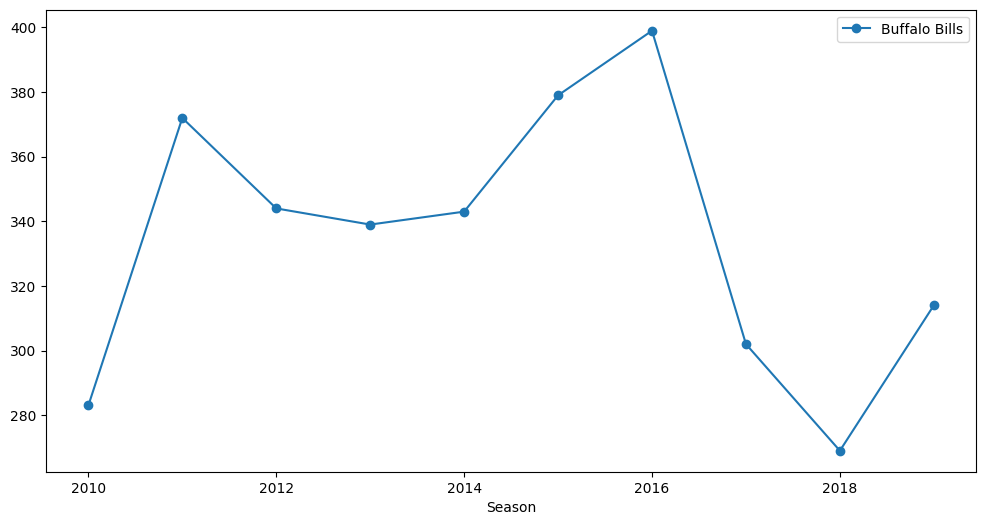

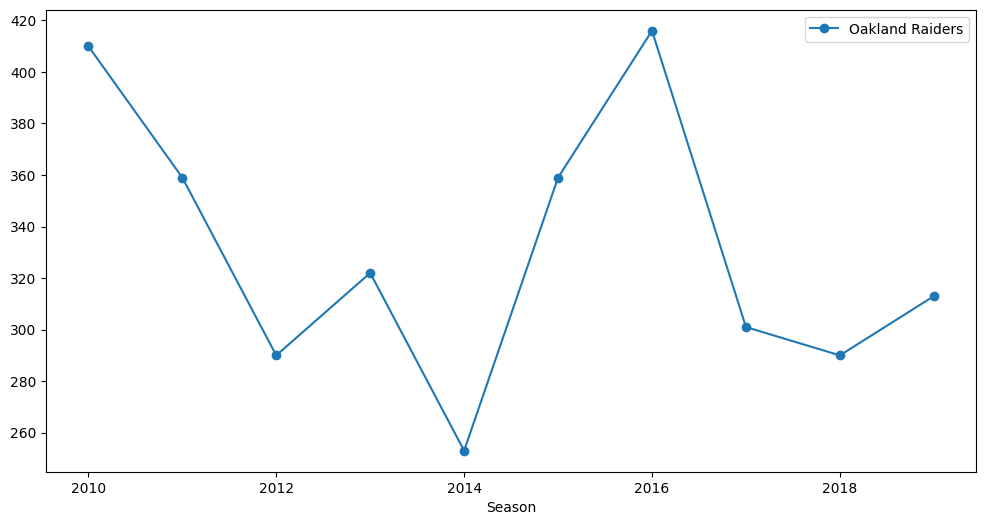

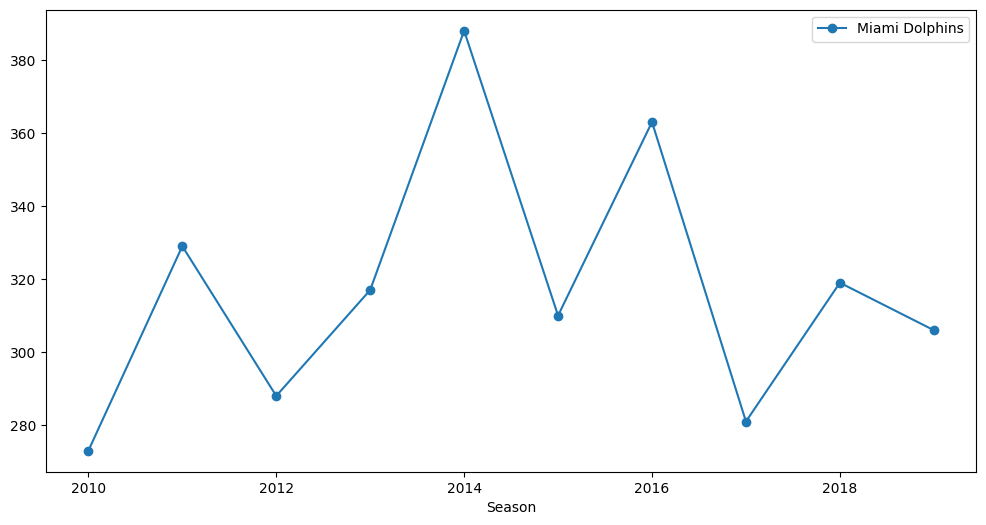

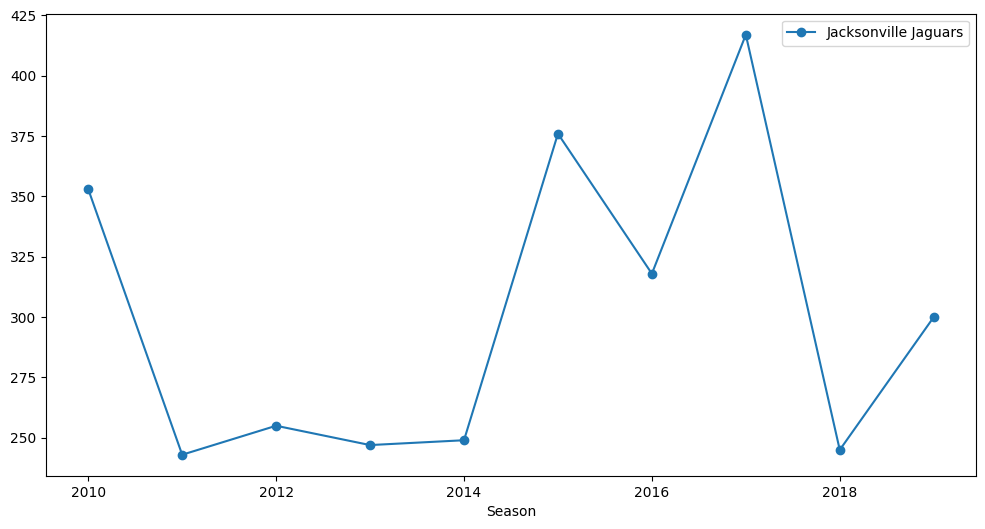

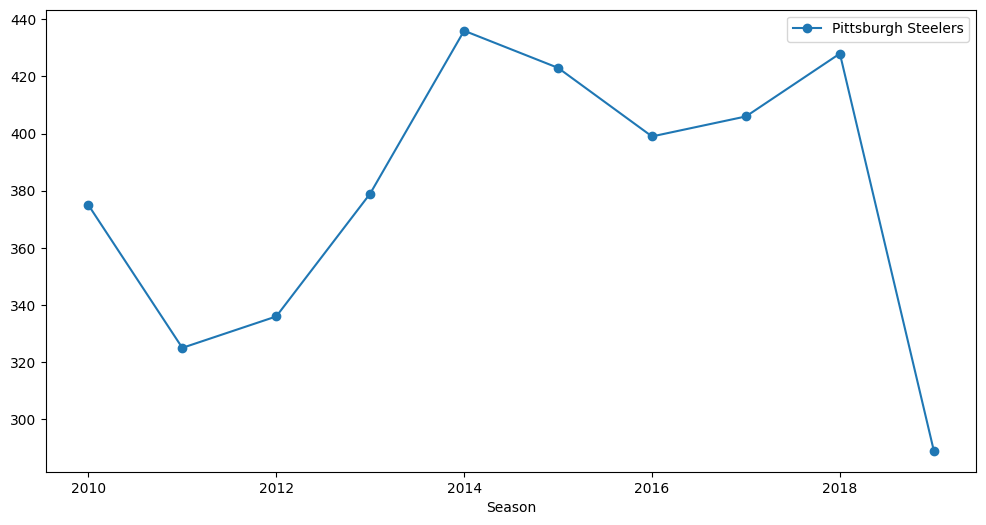

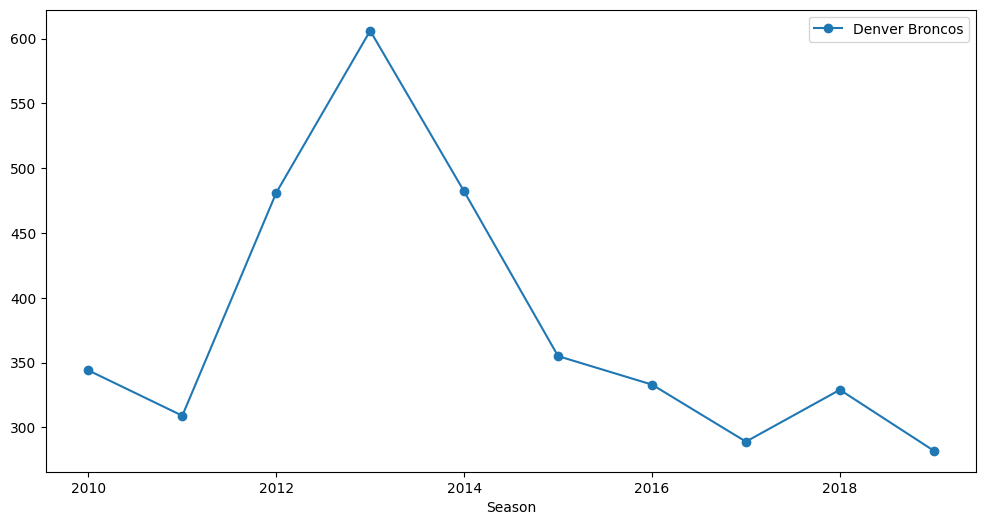

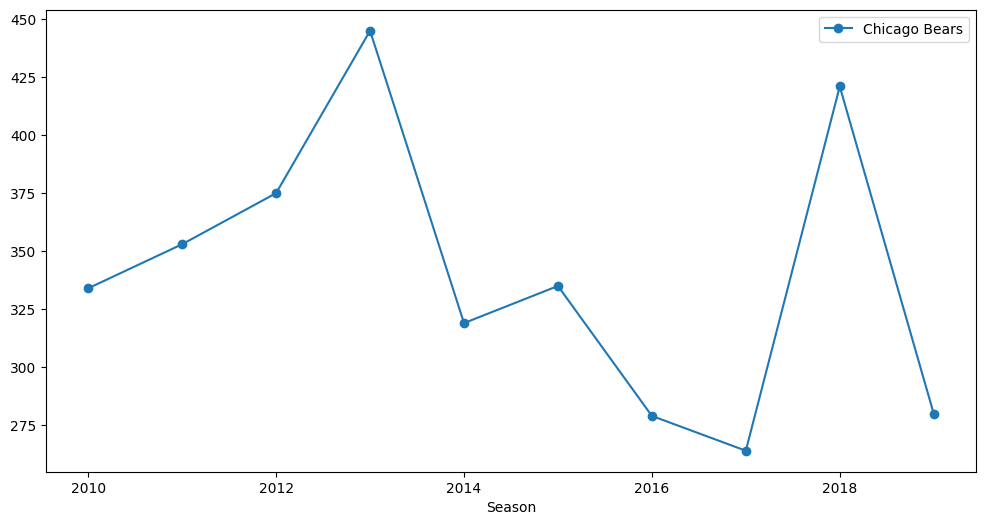

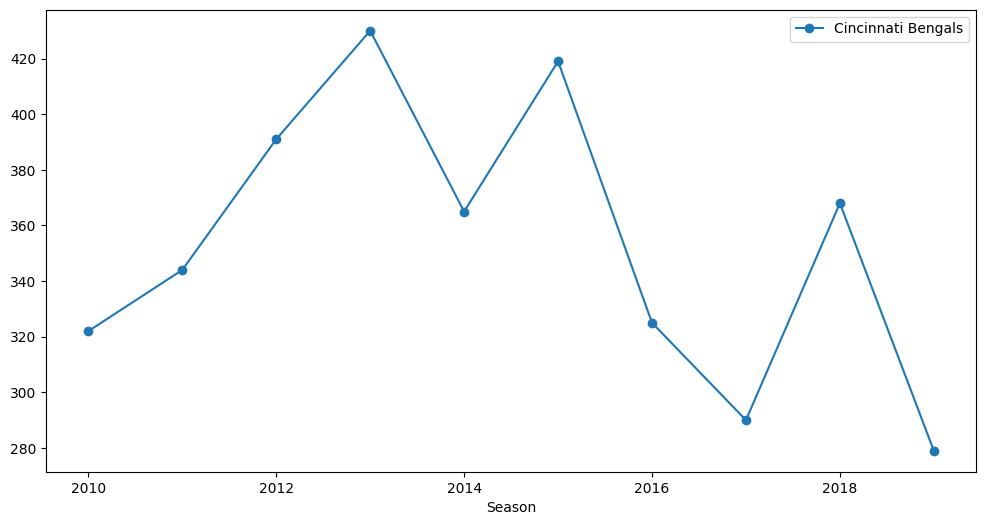

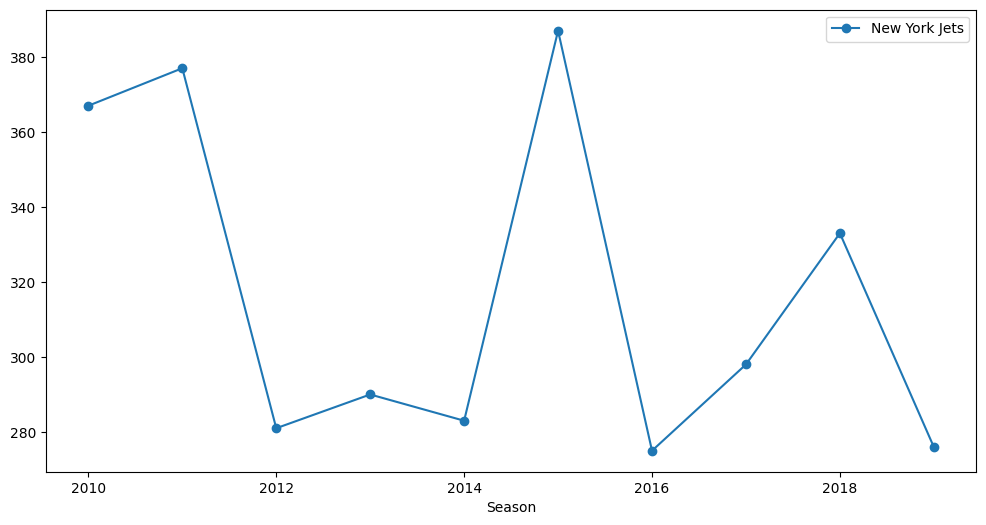

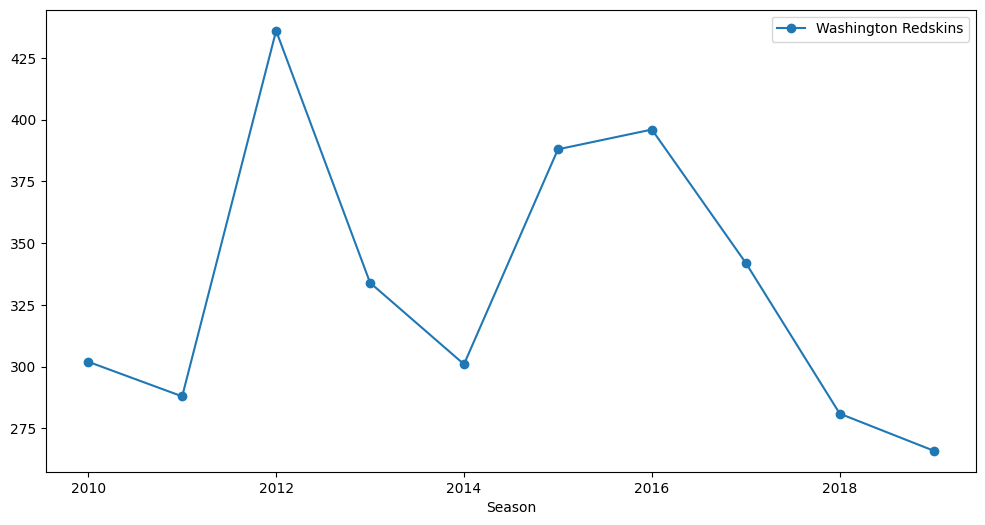

In [224]:

# Iterate through each team and create a line plot
for i, team in enumerate(data['Team'].unique()):
    team_data = data[data['Team'] == team]
    team_data.plot(x='Season', y='Points Scored', marker='o', linestyle='-',label=team,subplots=True, sharex=False, sharey=False,figsize = (12,6))

plt.show()